In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import requests

In [3]:
df = pd.read_feather('traceroute_1.feather')
df

,index,created,probe_id,source_address,end_time,paris_id,total_hops,last_median_rtt,destination_ip_responded,last_hop_responded,is_success,last_hop_errors,total_hops_average_diff
0,0,2021-11-25 16:14:49+00:00,6025,213.225.160.239,2021-11-25 16:14:55+00:00,15,9,155.201,True,True,True,[],0.0
1,1,2021-11-25 16:14:59+00:00,6030,193.105.163.172,2021-11-25 16:15:06+00:00,15,12,161.019,True,True,True,[],0.0
2,2,2021-11-25 16:14:59+00:00,6031,145.220.0.55,2021-11-25 16:15:25+00:00,15,9,152.612,True,True,True,[],0.0
3,3,2021-11-25 16:14:53+00:00,6041,213.190.96.41,2021-11-25 16:15:26+00:00,15,7,192.820,True,True,True,[],0.0
4,4,2021-11-25 16:14:58+00:00,6043,192.65.184.54,2021-11-25 16:15:13+00:00,15,9,194.379,True,True,True,[],0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345843,345843,2021-11-30 15:00:02+00:00,7030,45.11.104.146,2021-11-30 15:00:17+00:00,10,12,152.791,True,True,True,[],0.0
345844,345844,2021-11-30 15:00:01+00:00,7033,85.93.215.82,2021-11-30 15:00:04+00:00,10,11,145.836,True,True,True,[],0.0
345845,345845,2021-11-30 15:00:04+00:00,7039,103.170.232.152,2021-11-30 15:00:30+00:00,10,9,108.516,True,True,True,[],0.0
345846,345846,2021-11-30 15:00:00+00:00,7045,5.188.202.25,2021-11-30 15:00:00+00:00,10,1,0.091,True,True,True,[],0.0


In [5]:
def calc_score(median, hops):
    if hops is None:
        return 0
    return abs(hops-median)

In [6]:
def normalize(min_score, max_score, score):
    if max_score-min_score == 0:
        return 0
    return (score-min_score) / (max_score-min_score)

In [8]:
def get_country_code(probe_id):
    response = requests.get(f"https://atlas.ripe.net/api/v2/probes/{probe_id}").json()
    return response['country_code']

In [9]:
"""
x- as de tijd
y- as de unieke probes
de kleur van licht naar donker. Licht is als er niets aan de hand is en donker als het een aantal standaard afwijkingen afwijkt
 """

unique_probes = df['probe_id'].unique()

for i, probe_id in enumerate(unique_probes):
    hops_series_probe = df[df['probe_id'] == probe_id]['total_hops']
    median = hops_series_probe.median()
    scores = hops_series_probe.apply(lambda total_hops: calc_score(median, total_hops))
    score_max = scores.max()
    score_min = scores.min()
    normalized_scores = scores.apply(lambda score: normalize(score_min, score_max, score))
    df.loc[df['probe_id'] == probe_id, 'not_normalized_score'] = scores
    df.loc[df['probe_id'] == probe_id, 'normalized_score'] = normalized_scores
    df.loc[df['probe_id'] == probe_id, 'country_code'] = get_country_code(probe_id)
    
df

,index,created,probe_id,source_address,end_time,paris_id,total_hops,last_median_rtt,destination_ip_responded,last_hop_responded,is_success,last_hop_errors,total_hops_average_diff,not_normalized_score,normalized_score,country_code
0,0,2021-11-25 16:14:49+00:00,6025,213.225.160.239,2021-11-25 16:14:55+00:00,15,9,155.201,True,True,True,[],0.0,0.0,0.0,FR
1,1,2021-11-25 16:14:59+00:00,6030,193.105.163.172,2021-11-25 16:15:06+00:00,15,12,161.019,True,True,True,[],0.0,0.0,0.0,RS
2,2,2021-11-25 16:14:59+00:00,6031,145.220.0.55,2021-11-25 16:15:25+00:00,15,9,152.612,True,True,True,[],0.0,0.0,0.0,NL
3,3,2021-11-25 16:14:53+00:00,6041,213.190.96.41,2021-11-25 16:15:26+00:00,15,7,192.820,True,True,True,[],0.0,0.0,0.0,IS
4,4,2021-11-25 16:14:58+00:00,6043,192.65.184.54,2021-11-25 16:15:13+00:00,15,9,194.379,True,True,True,[],0.0,0.0,0.0,FR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345843,345843,2021-11-30 15:00:02+00:00,7030,45.11.104.146,2021-11-30 15:00:17+00:00,10,12,152.791,True,True,True,[],0.0,0.0,0.0,CN
345844,345844,2021-11-30 15:00:01+00:00,7033,85.93.215.82,2021-11-30 15:00:04+00:00,10,11,145.836,True,True,True,[],0.0,0.0,0.0,LU
345845,345845,2021-11-30 15:00:04+00:00,7039,103.170.232.152,2021-11-30 15:00:30+00:00,10,9,108.516,True,True,True,[],0.0,0.0,0.0,JP
345846,345846,2021-11-30 15:00:00+00:00,7045,5.188.202.25,2021-11-30 15:00:00+00:00,10,1,0.091,True,True,True,[],0.0,0.0,0.0,US


In [10]:
# select probes
print(unique_probes[0:10])
selected_df = df[df['probe_id'].isin(unique_probes[0:10])]


[6025 6030 6031 6041 6043 6053 6054 6063 6071 6072]


In [11]:
# group scores by country_code use the average of scores
sorted_df = df.sort_values('country_code')

<AxesSubplot:xlabel='created', ylabel='probe_id'>

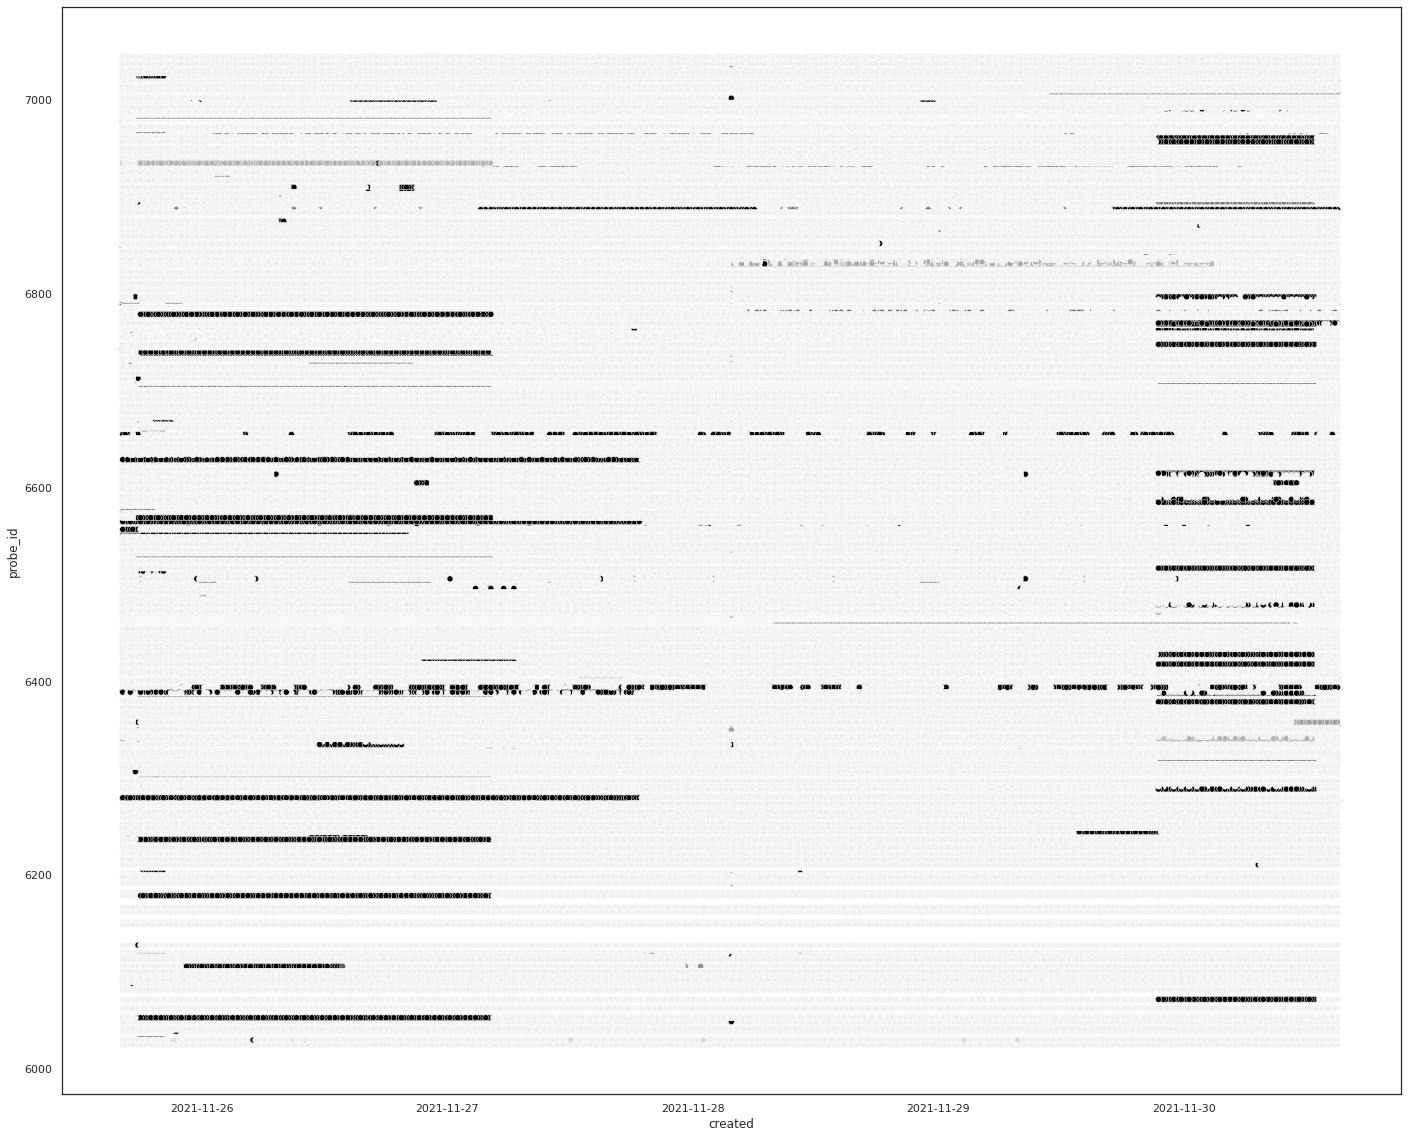

In [13]:
sns.set(rc={"figure.figsize":(24, 20)})
sns.set_style("white")
sns.scatterplot(data=sorted_df, x="created", y="probe_id", hue="normalized_score",legend=False, palette="light:black")

<AxesSubplot:xlabel='created', ylabel='probe_id'>

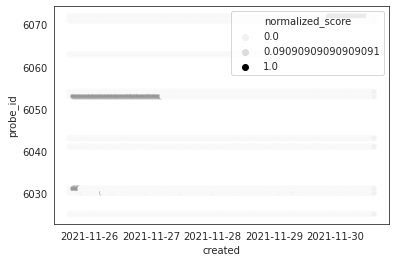

In [9]:

sns.scatterplot(data=selected_df, x="created", y="probe_id", hue="normalized_score", palette="light:black")

In [119]:
def get_asns(unique_probe_ids):
    asns= []
    for probe_id in unique_probe_ids:
        response = requests.get(f"https://atlas.ripe.net/api/v2/probes/{probe_id}").json()
        asns.append(response['asn_v4'])
    return asns
    

In [120]:
print(get_asns(unique_probes))

[8839, 13004, 1101, 25509, 513, 10474, 28000, 50168, 2611, 7922, 33988, 21282, 43996, 8781, 14907, 16004, 14907, 8676, 53824, 29632, 198068, 1133, 7590, 43996, 28753, 56055, 37474, 33920, 3274, 2128, 24725, 12676, 34587, 26167, 327844, 9158, 135150, 9158, 42961, 12859, 12731, 21412, 25291, 6667, 2602, 8560, 719, 5377, 39405, 3257, 199993, 15133, 49784, 34288, 206549, 35003, 5379, 1307, 25192, 15133, 39029, 15133, 42409, 8522, 15133, 37577, 1764, 38001, 61138, 12779, 198985, 50170, 206186, 25406, 48943, 62416, 42473, 6724, 20766, 2857, 42473, 42473, 62113, 10745, 203993, 2914, 199159, 680, 39351, 13041, 37386, 39878, 265721, 8670, 15133, 39138, 59105, 680, 36236, 30997, 58431, 5607, 52039, 4764, 21473, 17054, 52336, 42473, 264811, 5539, 22894, 31287, None, 202196, 55002, 34549, 48276, 48112, 17054, 42473, 41000, 50178, 2497, 59795, 9268, 48292, 41405, 50999, 206479, 20473, 20473, 60396, 15133, 35065, 48854, 35574, 55002, 20473, 20473, 16509, 16509, 16509, 16509, 16509, 16509, 16509, 550